# Homework #1: Mean-Variance Optimisation
### Polly Ren, FINM 25000, 6/20/2022

In [1]:
import pandas as pd

In [2]:
totals = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name = "total returns")
totals.set_index("Date", inplace = True)
totals

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2009-04-30,0.008993,-0.001000,0.155582,0.115190,0.138461,-0.027452,0.296151,0.230202,0.022882,0.000553,0.099347,-0.017951
2009-05-31,0.053672,0.162663,0.159400,0.131918,0.028554,-0.020773,0.022727,0.053893,0.027865,-0.000471,0.058453,0.019966
2009-06-30,0.005149,-0.026259,-0.022495,-0.014049,0.033517,-0.005571,-0.024863,0.045449,-0.003436,0.000599,-0.000655,0.001981
2009-07-31,0.031284,0.018568,0.110146,0.100415,0.069191,0.008317,0.105799,0.143247,0.015326,-0.000027,0.074606,0.000879
2009-08-31,0.007628,-0.040365,-0.013136,0.045031,-0.016969,0.007633,0.131938,0.033413,-0.004151,0.000435,0.036940,0.008414
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,-0.026176,0.078922,-0.000205,-0.036350,-0.026549,-0.021130,-0.082314,-0.086028,-0.020761,-0.000815,-0.052741,-0.020588
2022-02-28,-0.011197,0.064674,-0.043202,-0.034292,-0.008591,-0.003041,-0.045881,-0.073602,-0.006746,-0.000363,-0.029517,0.008557
2022-03-31,-0.042240,0.091747,-0.033811,0.005190,-0.012871,-0.040609,0.068646,-0.007721,-0.002587,-0.000363,0.037590,-0.018755


In [3]:
excess = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name = "excess returns")
excess.set_index("Date", inplace = True)
excess

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001553,0.155029,0.114637,0.137908,-0.028005,0.295598,0.229649,0.022329,0.098794,-0.018504
2009-05-31,0.054143,0.163134,0.159871,0.132389,0.029025,-0.020302,0.023198,0.054364,0.028336,0.058924,0.020438
2009-06-30,0.004550,-0.026858,-0.023094,-0.014648,0.032918,-0.006170,-0.025462,0.044850,-0.004035,-0.001254,0.001382
2009-07-31,0.031311,0.018595,0.110173,0.100442,0.069218,0.008345,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044596,-0.017404,0.007198,0.131503,0.032977,-0.004586,0.036505,0.007979
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,-0.025361,0.079737,0.000610,-0.035535,-0.025734,-0.020315,-0.081499,-0.085213,-0.019946,-0.051926,-0.019773
2022-02-28,-0.010834,0.065037,-0.042840,-0.033929,-0.008228,-0.002679,-0.045518,-0.073240,-0.006383,-0.029154,0.008919
2022-03-31,-0.041877,0.092110,-0.033449,0.005552,-0.012509,-0.040247,0.069009,-0.007359,-0.002225,0.037953,-0.018393


### 1  Summary Statistics

##### a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

In [64]:
import numpy as np
def get_mean_std(asset):
    print(asset, "mean:", excess[asset].mean()*12)
    print(asset, "volatility:", excess[asset].std()*np.sqrt(12))

In [65]:
get_mean_std("BWX")
get_mean_std("DBC")
get_mean_std("EEM")
get_mean_std("EFA")
get_mean_std("HYG")
get_mean_std("IEF")
get_mean_std("IYR")
get_mean_std("PSP")
get_mean_std("QAI")
get_mean_std("SPY")
get_mean_std("TIP")

BWX mean: 0.00881369700249321
BWX volatility: 0.07677082371082707
DBC mean: 0.047670588386368506
DBC volatility: 0.18164422545590764
EEM mean: 0.08248459885703832
EEM volatility: 0.19516683628912818
EFA mean: 0.09764128859560568
EFA volatility: 0.16604103186893066
HYG mean: 0.08991494707678852
HYG volatility: 0.10726964694987993
IEF mean: 0.03396829511261053
IEF volatility: 0.06975310230138623
IYR mean: 0.17004791942467912
IYR volatility: 0.19380899957444364
PSP mean: 0.15304744176202706
PSP volatility: 0.22252715744020227
QAI mean: 0.031389878828651296
QAI volatility: 0.062320215376775186
SPY mean: 0.1729001865498525
SPY volatility: 0.16296865693171916
TIP mean: 0.046445994404423104
TIP volatility: 0.06940667489048383


##### b) Which assets have the best and worst Sharpe ratios?

In [9]:
def calculate_sharpe(df):
    for asset in list(df):
        excess.at["Sharpe", asset] = excess[asset].mean() / excess[asset].std()
calculate_sharpe(excess)

In [36]:
excess.tail()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2022-02-28 00:00:00,-0.010834,0.065037,-0.042840,-0.033929,-0.008228,-0.002679,-0.045518,-0.073240,-0.006383,-0.029154,0.008919
2022-03-31 00:00:00,-0.041877,0.092110,-0.033449,0.005552,-0.012509,-0.040247,0.069009,-0.007359,-0.002225,0.037953,-0.018393
2022-04-30 00:00:00,-0.069406,0.056699,-0.061061,-0.067101,-0.041513,-0.041992,-0.041014,-0.125388,-0.033108,-0.087479,-0.021540
2022-05-31 00:00:00,0.010315,0.052461,-0.008722,0.025143,0.024185,0.015864,-0.033610,0.012375,-0.003283,0.006978,-0.003782
Sharpe,0.032645,0.075672,0.121927,0.169706,0.242000,0.140570,0.253282,0.198518,0.145350,0.306269,0.194055


In [35]:
best_sharpe_val = excess.loc["Sharpe"].iloc[1]
worst_sharpe_val = excess.loc["Sharpe"].iloc[1]
best_sharpe = excess.iloc[0,1]
worst_sharpe = excess.iloc[0,1]
for asset in excess:
    if excess.loc["Sharpe", asset] > best_sharpe_val:
        best_sharpe = asset
        best_sharpe_val = excess.loc["Sharpe", asset]
    elif excess.loc["Sharpe", asset] < worst_sharpe_val:
        worst_sharpe = asset
        worst_sharpe_val = excess.loc["Sharpe", asset]
print(best_sharpe, best_sharpe_val)
print(worst_sharpe, worst_sharpe_val)

SPY 0.30626857604814245
BWX 0.03264545363875796


SPY has the best Sharpe value of 0.30626857604814245, while BWX has the worst Sharpe value of 0.03264545363875796.

### 2  Descriptive Analysis

##### a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

In [43]:
corr = totals.corr()
corr

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
BWX,1.000000,0.325508,0.605680,0.555326,0.506194,0.323691,0.384561,0.479873,0.627329,0.102644,0.396518,0.555304
DBC,0.325508,1.000000,0.558936,0.578556,0.460296,-0.414040,0.282181,0.485035,0.528370,-0.186266,0.494877,0.064877
EEM,0.605680,0.558936,1.000000,0.851418,0.745497,-0.253119,0.602920,0.796636,0.800204,-0.108642,0.745782,0.227128
EFA,0.555326,0.578556,0.851418,1.000000,0.754129,-0.311079,0.669529,0.904902,0.830989,-0.164646,0.870442,0.150719
HYG,0.506194,0.460296,0.745497,0.754129,1.000000,-0.154525,0.736794,0.811427,0.747439,-0.127948,0.738016,0.228486
IEF,0.323691,-0.414040,-0.253119,-0.311079,-0.154525,1.000000,-0.060927,-0.304327,-0.076177,0.296575,-0.328993,0.672216
IYR,0.384561,0.282181,0.602920,0.669529,0.736794,-0.060927,1.000000,0.735932,0.609704,-0.136625,0.729380,0.284090
PSP,0.479873,0.485035,0.796636,0.904902,0.811427,-0.304327,0.735932,1.000000,0.816838,-0.197451,0.898231,0.166648
QAI,0.627329,0.528370,0.800204,0.830989,0.747439,-0.076177,0.609704,0.816838,1.000000,-0.111892,0.824195,0.362915
SHV,0.102644,-0.186266,-0.108642,-0.164646,-0.127948,0.296575,-0.136625,-0.197451,-0.111892,1.000000,-0.188728,0.066021


<AxesSubplot:>

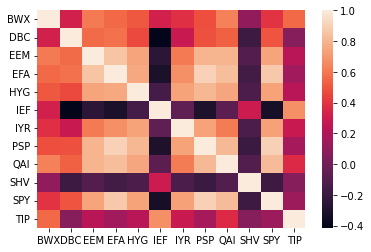

In [44]:
import seaborn
seaborn.heatmap(corr)

In [55]:
max(corr.copy().replace(1,0).max())

0.9049017403137383

In [60]:
max(corr.copy().replace(1,0))

'TIP'

In [56]:
min(corr.copy().replace(1,0).min())

-0.41403957248149575

In [58]:
corr.loc[max(corr.copy().replace(1,0)), corr.loc[max(corr.copy().replace(1,0))] == max(corr.copy().replace(1,0).max())]

Series([], Name: TIP, dtype: float64)

In [ ]:
corr[[]].idxmax()

In [50]:
min(corr.min())

-0.41403957248149575

In [52]:
corr.min().idxmin()

'DBC'

##### b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

TIPS is overall very helpful in diversifying our sample, which is indicated by the dark colouring of the TIP column in the heatmap above. Although domestic bonds have less correlation with other assets in our portfolio, TIPS has outperformed both domestic and foreign bonds in terms of the Sharpe ratio. 

##### c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

Yes, it seems that TIPS does expand Harvard's investment opportunity set, particularly with the increased diversification opportunities that result from considering them as an asset. 

### 3  The MV Frontier

##### a) Compute and display the weights of the tangency portfolios: w^tan.

##### b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to w^tan.

### 4  The Allocation

##### a) Compute and display the weights of MV portfolios with target returns of µ˜p = .01.

##### b) What is the mean, volatility, and Sharpe ratio for w^p?

##### c) Discuss the allocation. In which assets is the portfolio most long? And short?

##### d) Does this line up with which assets have the strongest Sharpe ratios?

### 5  Simple Portfolios

##### a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean µ˜ = .01. Report its mean, volatility, and Sharpe ratio.

##### b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate. w^i = 1/σ_i; This will give the weight vector, w, but you will need to rescale it to have a target mean of µ˜ = .01.

##### c) How does these compare to the MV portfolio from problem 2.4?

### 6  Out-of-Sample Performance
#### Let’s divide the sample to both compute a portfolio and then check its performance out of sample.

##### a) Using only data through the end of 2020, compute w^p for µ˜p = .01, allocating to all 11 assets.

##### b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the end of 2021.

##### c) Again using those weights, (derived using data through 2020,) calculate the portfolio’s Sharpe ratio based on performance in 2022.